In [ ]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf

#key to readings for the rest of the course 

In [ ]:
#RECAP:

#we run statistical tests

#tstat tells us the distance we fall from the mean, 
#pvalue tells us the area  from that tvalue --> inf 

In [ ]:
#OLS - ordinary least squares 

#Example from https://www.kaggle.com/c/bike-sharing-demand/data
# You are provided hourly rental data spanning two years. 
#For this competition, the training set is comprised of the first 19 days of each month, 
#while the test set is the 20th to the end of the month. 
#You must predict the total count of bikes rented during each hour covered by the test set, 
#using only information available prior to the rental period.


# Data Fields

# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

#trying to predict the count with the given indepenent variables, an example of supervised learning 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/bikeshare.csv"

bikes = pd.read_csv(url, index_col = 'datetime', parse_dates = True)

In [10]:
bikes.head(10) #note the use of index_col = "datetime"

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [9]:
#'count' represents the number of bikes rented per hour <-- our dependent variable

bikes.rename(columns={'count':'total_rentals'}, inplace = True) #rename the 'count' column 'total_rentals'

In [15]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#linear models tend to be well suited for structured data which is normally distributed 
#they will always be the fastest fit

#cannot get top level performance without 'ensemble models'

#if something is too non-linear, but still structured we use 'descision trees'

#if something is too non-linear, and unstrucutred (e.g. images), we use 'neural nets'

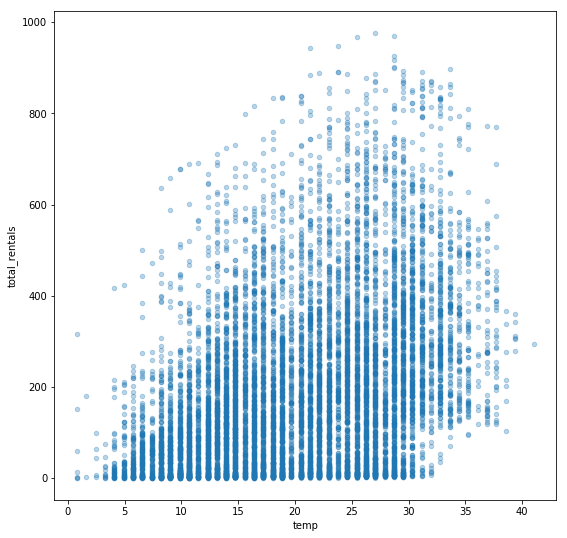

In [14]:
#Quick Visuals 

bikes.plot(kind="scatter", x ="temp", y="total_rentals", alpha = 0.3, figsize = (9,9))
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


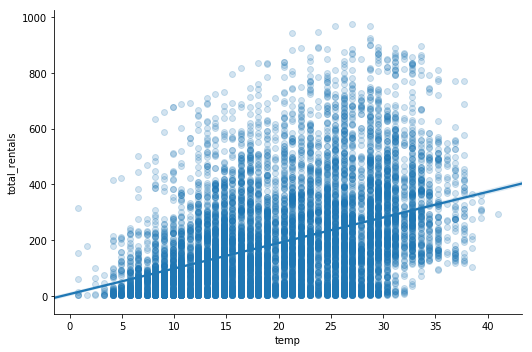

In [17]:
#line of best fit with seaborn
sns.lmplot(x = "temp", y="total_rentals", data=bikes, aspect = 1.5, scatter_kws = {"alpha":0.2})
plt.show()

In [ ]:
#Now working with Scikit Learn, most commonly used library for forecasting in Python 
##works off of numpy and pandas

#Benefits of scikit-learn::
##consistent interface to machine learning models
##contains a preprocessing API 

#Drawbacks of scikit-learn::
##will not run on GPU
#scikit learn is CPU only! <- hence Scikit learn is not good for unstructured data models (i.e. images/video)
##also cannot run statistical tests such as ANOVA, t-tests, for this we use 'statsmodels'

In [ ]:
#working with data in scikit learn, important notes::

#features and response should be two seperate ojects
#features and response should be entirely numeric
#features and response should be numpy arrays <- everything we feed into scikit learn must be numpy or pandas series
#features and response should have specific shape 

In [56]:
X = np.array(bikes["temp"]) #<- independent variables 
y = bikes.total_rentals #<- dependent (response) variable

In [65]:
type(X)

numpy.ndarray

In [45]:
print(X.shape) #(n,m) <- n observations on m variables 

(10886,)


In [59]:
X = np.reshape(X, (10886,1))

# Step1: Import the class you plan to use (ex/ linear regression class)

In [76]:
#The scikit-learn Four-Step modeling pattern
##consistent across all model building in scikit learn
from sklearn.linear_model import LinearRegression

# Step2: Create an instance of the class for our chosen estimator 

In [61]:
lr = LinearRegression() #we are initiating an instance of the LinearRegression class, lr is an object 
type(lr)

#every type of model (with its associated algorithm) exists as a class in sklearn
#to fit a model we create an instance an then call the .fit() method 

sklearn.linear_model.base.LinearRegression

In [62]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
#above are different parameters you can specify for your learning algorithm 
##note that this is obviously done PRE-fitting

# Step3: Fit the model on the data <- i.e. the learning stage

In [64]:
##process through which learning occurs varies by model

#to perform a fit, we do the following

lr.fit(X,y) #takes the instance of the linear regression class and fits the training data on the response variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#Recall a tvalue for a regression coefficent B_i

#tval = B_i - 0 / (SE(B_i))

#Where SE(B_i) is the standard error of the i-th beta-coefficient

# Step4: Predictions on out of sample data

In [69]:
lr.intercept_ #grab the intercept for this model

6.046212959616781

In [70]:
lr.coef_ #grab the vector of beta-coefficients for this model

array([9.17054048])

In [73]:
np.array([0]).reshape(1,-1)

[[0]]


In [71]:
lr.predict(np.array([0]).reshape(1,-1))
#a prediction of the total number of rentals if the temp were 0 degrees outside 

#note calling y = m*0 + b simply returns the intercept

array([6.04621296])

In [75]:
lr.predict(np.array([1]).reshape(1,-1)) #note every increment (every 1 celcius increase in temp ) 
#                                        increases the number of rentals by 9.1705

#NOTE: this is NOT a statement of causation

array([15.21675344])

In [77]:
#lets now create a vector of predictions based on some specified input

temps = np.array([[5], [6], [10]]) #note how each input value is stored in its own array

lr.predict(temps) #we call the predict method on a vector of input data and return a vector of predictions

array([51.89891537, 61.06945585, 97.75161777])

In [79]:
lr.predict(np.array([[25]]))

array([235.309725])

In [80]:
9.17054048*25 + 6.046212959616781

235.30972495961677

In [81]:
#Does the scale of features matter?

#lets say temperature was measured in Fahrenheit rahter than Celsius, how would this affect the model? 

#lets create a new feature, bikes in Fahrenheit

bikes["temp_F"] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


In [89]:
X = np.array(bikes["temp_F"])
X = np.reshape(X, (10886,1))
y = bikes.total_rentals

#linreg = LinearRegression()
#linreg.fit(X,y)



In [90]:
linreg = LinearRegression()


In [91]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print(linreg.intercept_)
print(linreg.coef_)

-156.98561782129445
[5.09474471]


In [93]:
#note the numbers are different than before

#convert 25 degress celcius to faher

25*1.8 + 32 #25 degrees celcius is 77 degees faher

77.0

In [94]:
77*5.09474471 + -156.98561782129445 #note we get the same prediction as with the celcius model 

235.3097248487055

In [ ]:
(x*1.8 + 32) * 5.0947 + -156.98561782129445

#note if we feed in f(x) = x*1.8 + 32 into our Fahernheight model converts us back to our celcius model 

In [95]:
1.8*5.0947 #note this is the slope of our celcius model

9.17046

In [96]:
32*5.0947 + -156.98561782129445 #this is the intercept of our celcius model

6.044782178705532

In [97]:
#scale changes alters the coefficients and thus the interpretation, however in terms of predictions 
#we will get the same results 

In [ ]:
#most of the time before you do linear regression is that you want standardize data <- de-mean/divide by variance
#this helps with interpretation 
 
#note: unstandardized data can have vastly different numeric range
## the columns with huge values will have a very tiny beta coefficents
## while the columns with very tiny values will have very large beta coefficents

#again standardizing S(x) (just like converting to faher) is a linear function on the data, 
#  thus standardizing the data will have no effect on the prediction we get

#if we have a non-linear transformations on our data, 'decision trees' may be a better way to go

#you could also perform non-linear transform your data and then fit a linear model, 
##ex/ apply the ln() or squaring function element-wise to one of your features 

In [ ]:
#if your data is linear then it is normally distributed <- look into this

#look into tests for linearity of data matrices

In [98]:
bikes.drop("temp_F", axis = 1, inplace = True)

In [99]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


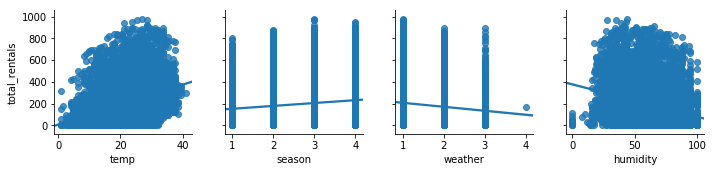

In [101]:
#Let's perform a multivariable regression on the bikes data using scikit learn

feature_cols = ["temp", "season", "weather", "humidity"] #<-specify the list of features we want to regress on

#often we fit on a large number of features and then narrow the feature-space down

sns.pairplot(bikes, x_vars = feature_cols, y_vars = "total_rentals", kind = "reg")
plt.show()

In [ ]:
#RECALL

# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

In [102]:
#define the design matrix and target vector 
X = bikes[feature_cols]
y = bikes.total_rentals

In [107]:
X.head()

,temp,season,weather,humidity
datetime,,,,
2011-01-01 00:00:00,9.84,1,1,81
2011-01-01 01:00:00,9.02,1,1,80
2011-01-01 02:00:00,9.02,1,1,80
2011-01-01 03:00:00,9.84,1,1,75
2011-01-01 04:00:00,9.84,1,1,75


In [106]:
X.shape #check the shape of design matrix

(10886, 4)

In [105]:
lr.fit(X,y) #fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
lr.coef_ #temp,       season,      weather,      humidty 

array([ 7.86482499, 22.53875753,  6.67030204, -3.11887338])

In [109]:
lr.intercept_

159.52068786129817

In [ ]:
#so under this instance of the LinearRegression we have that 
#total_counts = 7.8648*temp + 22.5387*season + 6.6703*weather -3.118*humidty + err

In [111]:
lr.score(X,y) #note the .score() function with scikit learn, takes our design matrix and target as input 

                #returns the R-squared value of our model <- how much of the variability in target is explained by X 

0.2582975832728214